#### Dataset Link: https://www.kaggle.com/datasets/noeyislearning/employment-trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/Users/taimourabdulkarim/Documents/Lums/Data Engineering/Assignments/Assignment 1/data/raw/employment_trends.csv')
df.head()


,REF_DATE,GEO,DGUID,Estimate,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001-01,Canada,2021A000011124,Employment for all employees,Industrial aggregate including unclassified bu...,Persons,249,units,0,v79310773,1.1.1,12918423.0,NaN,NaN,NaN,0
1,2001-01,Canada,2021A000011124,Employment for all employees,Industrial aggregate excluding unclassified bu...,Persons,249,units,0,v79310776,1.1.2,12839228.0,NaN,NaN,NaN,0
2,2001-01,Canada,2021A000011124,Employment for all employees,Goods producing industries [11-33N],Persons,249,units,0,v79310775,1.1.3,2914169.0,NaN,NaN,NaN,0
3,2001-01,Canada,2021A000011124,Employment for all employees,"Forestry, logging and support [11N]",Persons,249,units,0,v79310774,1.1.4,70073.0,NaN,NaN,NaN,0
4,2001-01,Canada,2021A000011124,Employment for all employees,"Mining, quarrying, and oil and gas extraction ...",Persons,249,units,0,v79310777,1.1.10,136744.0,NaN,NaN,NaN,0


In [ ]:
df.columns


Index(['REF_DATE', 'GEO', 'DGUID', 'Estimate',
       'North American Industry Classification System (NAICS)', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [ ]:
df.shape


(215460, 16)

In [ ]:
df.isnull().sum()


REF_DATE                                                      0
GEO                                                           0
DGUID                                                         0
Estimate                                                      0
North American Industry Classification System (NAICS)         0
UOM                                                           0
UOM_ID                                                        0
SCALAR_FACTOR                                                 0
SCALAR_ID                                                     0
VECTOR                                                        0
COORDINATE                                                    0
VALUE                                                     40542
STATUS                                                    58603
SYMBOL                                                   215460
TERMINATED                                               215460
DECIMALS                                

In [ ]:
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], errors='coerce')


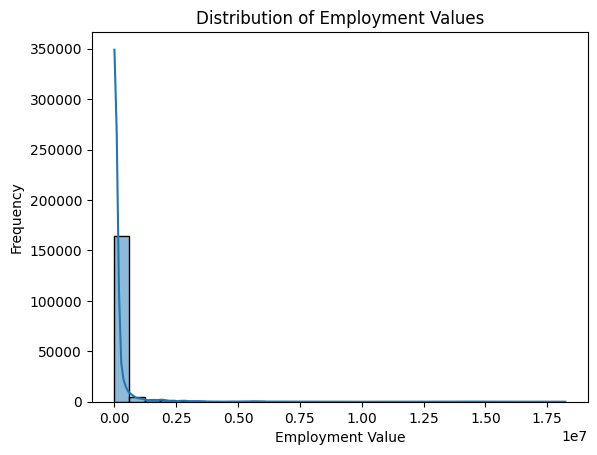

In [ ]:
# Distribution of employment values
sns.histplot(df['VALUE'].dropna(), bins=30, kde=True)
plt.title('Distribution of Employment Values')
plt.xlabel('Employment Value')
plt.ylabel('Frequency')
plt.show()


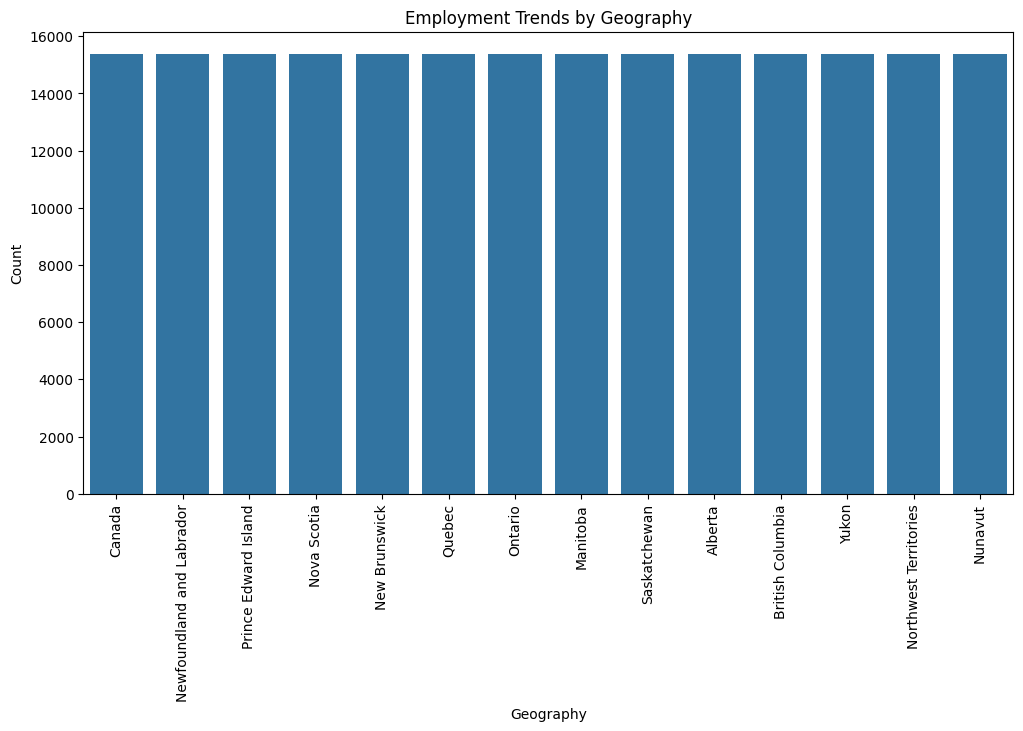

In [ ]:
# Employment trends by geography
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='GEO', order=df['GEO'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Employment Trends by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()


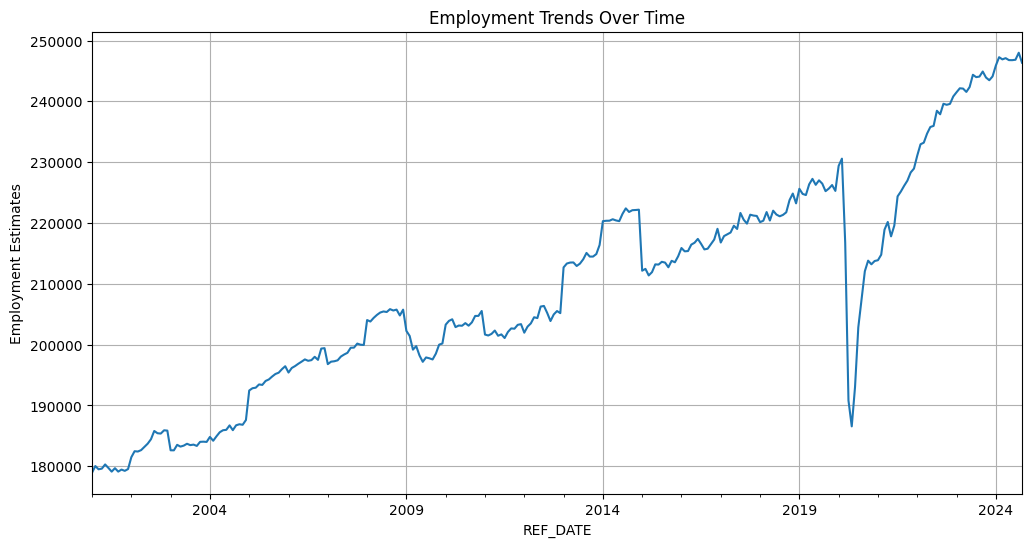

In [11]:
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df.set_index('REF_DATE', inplace=True)
df.groupby('REF_DATE')['VALUE'].mean().plot(figsize=(12,6), title="Employment Trends Over Time")
plt.ylabel('Employment Estimates')
plt.grid(True)
plt.show()


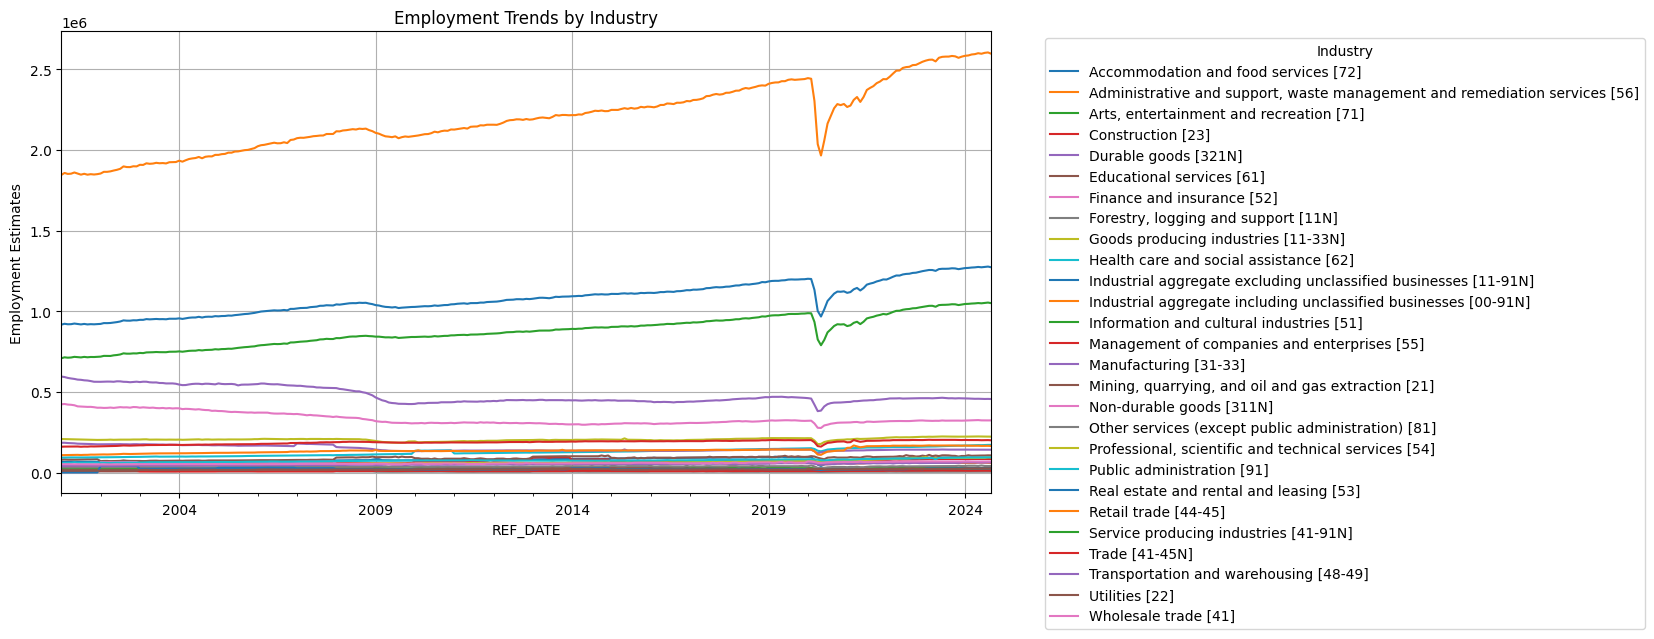

In [ ]:
industry_trend = df.pivot_table(index='REF_DATE', columns='North American Industry Classification System (NAICS)', values='VALUE')
industry_trend.plot(figsize=(12,6), title="Employment Trends by Industry")
plt.ylabel('Employment Estimates')
plt.grid(True)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


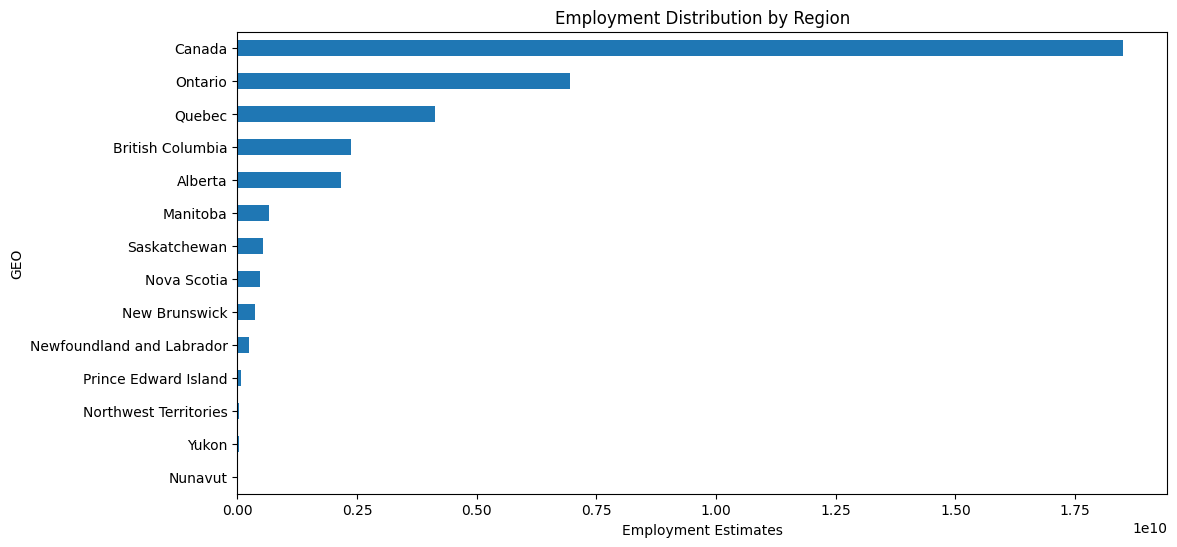

In [15]:
df.groupby('GEO')['VALUE'].sum().sort_values().plot(kind='barh', figsize=(12,6), title="Employment Distribution by Region")
plt.xlabel('Employment Estimates')
plt.show()


/var/folders/3b/4_hjjmqj5rlg74dkr9q3dpjc0000gn/T/ipykernel_45505/672512488.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Employment Growth Rate'] = df.groupby('GEO')['VALUE'].pct_change() * 100


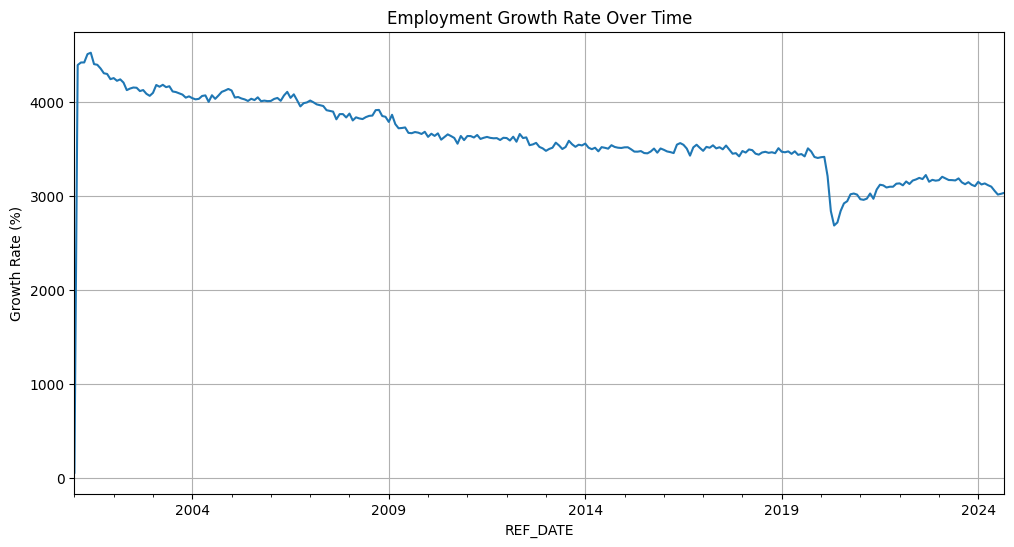

In [16]:
df['Employment Growth Rate'] = df.groupby('GEO')['VALUE'].pct_change() * 100
df.groupby('REF_DATE')['Employment Growth Rate'].mean().plot(figsize=(12,6), title="Employment Growth Rate Over Time")
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()
